In [1]:
__version__ = "2.0"

# Stock Visualization Analisys

In [1]:
# parameters.py
from parameters import get_parameters_pnl as get_parameters

# interpolation.py
import interpolation as itpl
from interpolation import aggregate

# Standard Library
from datetime import datetime, timedelta
import calendar
from collections import defaultdict
from time import perf_counter

# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (16,10/2)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["rebeccapurple", "darkcyan", "deepskyblue", "olivedrab", "lawngreen", "darkkhaki", "darkgoldenrod", "saddlebrown", "firebrick", "deeppink"])

# Capital with 95% confidence

In [4]:
replicates = 100
conf = 0.95
t_score = stats.t.ppf((1 + conf) / 2., replicates - 1)
ci_coef = t_score / np.sqrt(replicates)

In [5]:
from parameters import get_parameters_pnl

parameters, months = get_parameters_pnl()
aggregated_df, dfs_interpolates = aggregate(parameters,replicates,['capital'])

del dfs_interpolates

df_means_pnl = aggregated_df.mean()
df_std_pnl = aggregated_df.std(ddof=1)
df_minus2std_pnl = df_means_pnl - ci_coef * df_std_pnl
df_plus2std_pnl = df_means_pnl + ci_coef * df_std_pnl

del aggregated_df

In [6]:
from parameters import get_parameters_pl

parameters, months = get_parameters_pl()
aggregated_df, dfs_interpolates = aggregate(parameters,replicates,['capital'])

del dfs_interpolates

df_means_pl = aggregated_df.mean()
df_std_pl = aggregated_df.std(ddof=1)
df_minus2std_pl = df_means_pl - ci_coef * df_std_pl
df_plus2std_pl = df_means_pl + ci_coef * df_std_pl

del aggregated_df

In [7]:
from parameters import get_parameters_e

parameters, months = get_parameters_e()
aggregated_df, dfs_interpolates = aggregate(parameters,replicates,['capital'])

del dfs_interpolates

df_means_e = aggregated_df.mean()
df_std_e = aggregated_df.std(ddof=1)
df_minus2std_e = df_means_e - ci_coef * df_std_e
df_plus2std_e = df_means_e + ci_coef * df_std_e

del aggregated_df

In [8]:
from parameters import get_parameters_l

parameters, months = get_parameters_l()
aggregated_df, dfs_interpolates = aggregate(parameters,replicates,['capital'])

del dfs_interpolates

df_means_l = aggregated_df.mean()
df_std_l = aggregated_df.std(ddof=1)
df_minus2std_l = df_means_l - ci_coef * df_std_l
df_plus2std_l = df_means_l + ci_coef * df_std_l

del aggregated_df

In [9]:
print(f"PNL Scenario: {df_means_pnl['capital'].iloc[-1]:>7.0f} ± {ci_coef * df_std_pnl['capital'].iloc[-1]:.0f}")
print(f" PL Scenario: {df_means_pl['capital'].iloc[-1]:>7.0f} ± {ci_coef * df_std_pl['capital'].iloc[-1]:.0f}")
print(f"  E Scenario: {df_means_e['capital'].iloc[-1]:>7.0f} ± {ci_coef * df_std_e['capital'].iloc[-1]:.0f}")
print(f"  L Scenario: {df_means_l['capital'].iloc[-1]:>7.0f} ± {ci_coef * df_std_l['capital'].iloc[-1]:.0f}")

PNL Scenario:  233774 ± 13869
 PL Scenario:  218853 ± 12658
  E Scenario:    7559 ± 337
  L Scenario:  -22557 ± 25


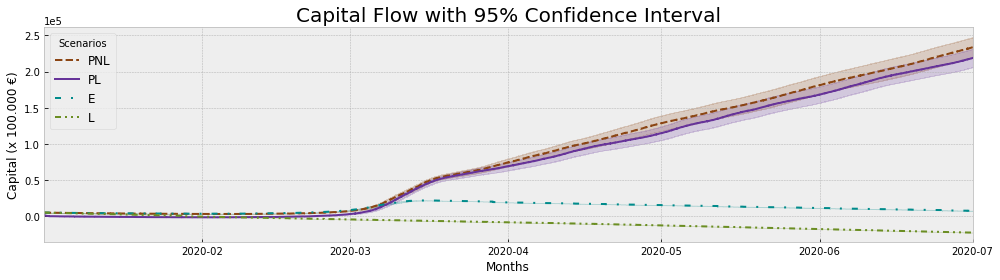

In [22]:
plt.figure(figsize=(14,4))

plt.plot(df_means_pnl['capital'], linestyle = "dashed", label='PNL', color='saddlebrown')
plt.fill_between(df_means_pnl['capital'].index, df_minus2std_pnl['capital'], df_plus2std_pnl['capital'], alpha=0.2, color='saddlebrown')

plt.plot(df_means_pl['capital'], linestyle = "solid", label='PL', color='rebeccapurple')
plt.fill_between(df_means_pl['capital'].index, df_minus2std_pl['capital'], df_plus2std_pl['capital'], alpha=0.2, color='rebeccapurple')

plt.plot(df_means_e['capital'], linestyle=(0, (3, 5, 1, 5)), label='E', color='darkcyan')
plt.fill_between(df_means_e['capital'].index, df_minus2std_e['capital'], df_plus2std_e['capital'], alpha=0.2, color='darkcyan')

plt.plot(df_means_l['capital'], linestyle =(0, (3, 2, 1, 2, 1, 2)), label='L', color='olivedrab')
plt.fill_between(df_means_l['capital'].index, df_minus2std_l['capital'], df_plus2std_l['capital'], alpha=0.2, color='olivedrab')

plt.xlabel('Months', fontsize=12)
plt.ylabel('Capital (x 100.000 €)', fontsize=12)

plt.xlim(df_means_pnl.index[0], df_means_pnl.index[-1])

plt.title('Capital Flow with 95% Confidence Interval', fontsize=20)

plt.legend(loc="upper left", title='Scenarios', fontsize=12)
plt.gca().ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.tight_layout()
plt.savefig(f'images/capital_confidence.png', dpi=300)
plt.show()

# Runs

In [5]:
from parameters import get_parameters_pnl

replicates = 100

parameters, months = get_parameters_pnl()
aggregated_df, dfs_interpolates = aggregate(parameters,replicates,['capital'])

del aggregated_df

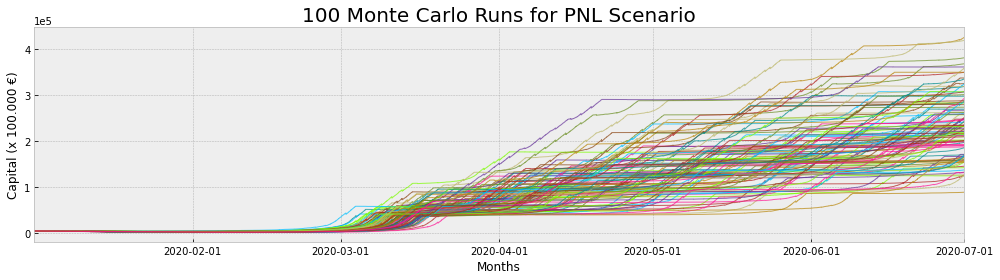

In [6]:
plt.figure(figsize=(14,4))

for df in dfs_interpolates:
    df['capital'].plot(linewidth=1, alpha=0.7)

plt.xticks(plt.gca().get_xticks(), rotation=0, ha='center')
plt.xlim(df.index[0], df.index[-1])

plt.xlabel('Months', fontsize=12)
plt.ylabel('Capital (x 100.000 €)', fontsize=12)

plt.title(f'{replicates} Monte Carlo Runs for PNL Scenario', fontsize=20)

plt.gca().ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.tight_layout()
plt.savefig(f'images/montecarlo.png', dpi=300)
plt.show()

# Heteroscedasticity

In [4]:
from parameters import get_parameters_pnl

replicates = 20
conf = 0.95
t_score = stats.t.ppf((1 + conf) / 2., replicates - 1)
ci_coef = t_score / np.sqrt(replicates)

parameters, months = get_parameters_pnl()
aggregated_df, dfs_interpolates = aggregate(parameters,replicates,['capital'])

del dfs_interpolates

df_means_pnl = aggregated_df.mean()
df_std_pnl = aggregated_df.std(ddof=1)

df_minus2std_pnl = df_means_pnl - ci_coef * df_std_pnl
df_plus2std_pnl = df_means_pnl + ci_coef * df_std_pnl

del df_means_pnl, df_std_pnl

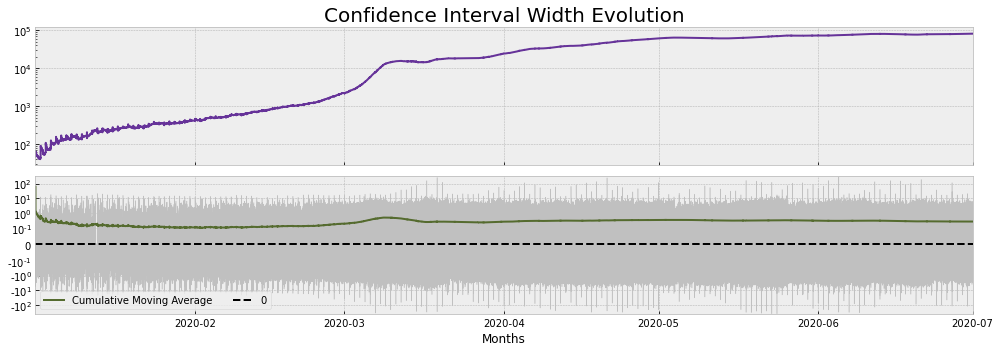

In [30]:
#plt.rcParams['agg.path.chunksize'] = 10000.

fig, axes = plt.subplots(2,1,figsize=(14,5), sharex=True)

axes[0].plot(df_plus2std_pnl.index, df_plus2std_pnl['capital'] - df_minus2std_pnl['capital'])
axes[0].set_yscale('log')
axes[0].set_xlim(df_plus2std_pnl.index[0], df_plus2std_pnl.index[-1])
axes[0].set_title('Confidence Interval Width Evolution', fontsize=20)

diff = np.diff((df_plus2std_pnl - df_minus2std_pnl)['capital'], prepend=True)

axes[1].plot(df_plus2std_pnl.index, diff, linewidth=0.5, color='silver')
axes[1].plot(df_plus2std_pnl.index, diff.cumsum()/np.arange(1,diff.size+1), linewidth=2, linestyle='-', color='darkolivegreen', label='Cumulative Moving Average')
axes[1].set_xlim(df_plus2std_pnl.index[0], df_plus2std_pnl.index[-1])
axes[1].set_yscale('symlog', linthreshy=0.1)
axes[1].axhline(0,color='black', linestyle='--', label='0')
axes[1].legend(ncol=2)

plt.xlabel('Months')
plt.tight_layout()
plt.savefig('images/heteroscedasticity.png', dpi=400)
plt.show()

# s,S Policy

In [10]:
from common import calc_total_days
from stock_system import simulate, set_random_state
from datetime import datetime

In [11]:
initial_date = datetime(2020, 1, 1)
months = 6

parameters = {
    #ARRIVALS
    "avg_daily_arrivals" : 3,
    "avg_sale_size" : 2,
    "max_arrivals" : 20,
    "min_arrivals" : 1,
    "growth" : 0.005,
    "decay_stock" : 0.1,
    "decay_price": 0.001,

    #BUSINESS
    "initial_investment": 2752,
    "profit": 1.5,
    "control_frequency" : 1,

    #COST
    "unit_cost": 3,
    "fixed_costs": 5000,

    #DATE
    "num_days": calc_total_days(initial_date, months),
    "initial_date": initial_date,

    #ORDER
    "min_order_delay" : 0.5,
    "mode_order_delay" : 1,
    "max_order_delay" : 6,

    #PRICE
    "market_price": 7,
    "price_ceiling": 14,

    #STOCK
    "initial_stock_level" : 1500,
    "stock_floor" : 200,
    "stock_ceiling" : 450,
    "max_stock" : 800,
}

set_random_state(42)
ss_policy = simulate(**parameters)

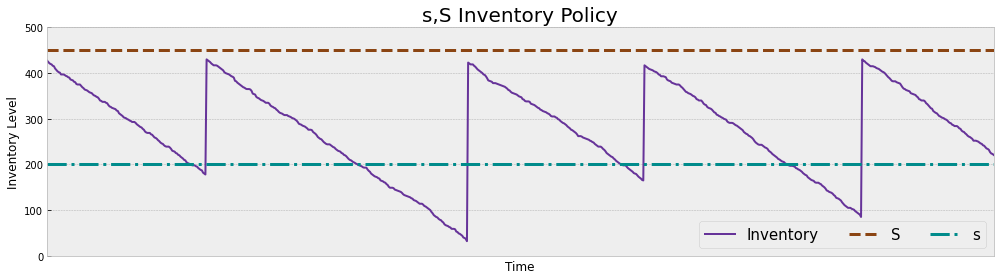

In [13]:
plt.figure(figsize=(14,4))
plt.plot(ss_policy['stock'], color='rebeccapurple', linestyle='-', label='Inventory')
plt.axhline(parameters['stock_ceiling'], color='saddlebrown', linewidth=3, linestyle='--', label='S')
plt.axhline(parameters['stock_floor'], color='darkcyan', linewidth=3, linestyle='-.', label='s')

plt.xticks([])
plt.xlim(700,1500)
plt.xlabel('Time', fontsize=12)

plt.ylim(0,500)
plt.ylabel('Inventory Level', fontsize=12)

plt.title('s,S Inventory Policy', fontsize=20)
plt.legend(fontsize=15, loc='lower right', ncol=3, fancybox=True, framealpha=1)
plt.tight_layout()
plt.savefig('images/ss_policy.png')
plt.show()